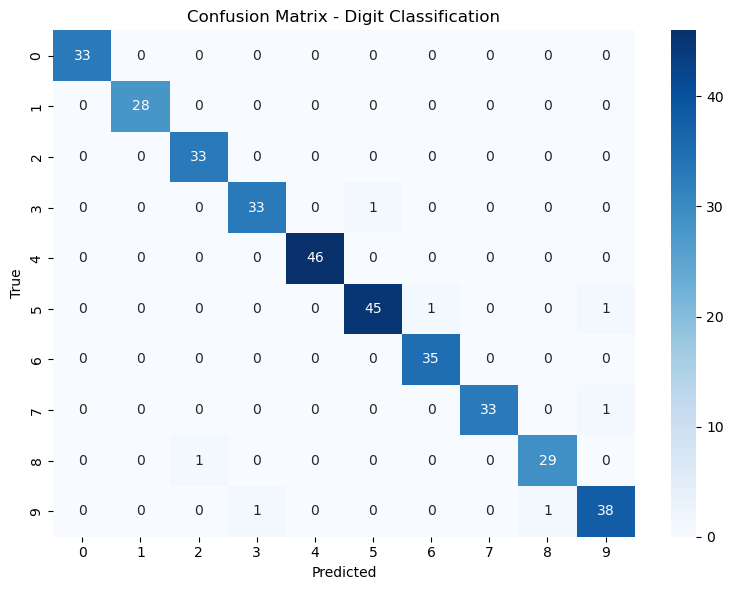

{'accuracy': 0.9805555555555555,
 'macro avg': {'precision': 0.9808326229042341,
  'recall': 0.9815289945765541,
  'f1-score': 0.9811061584133745,
  'support': 360.0},
 'weighted avg': {'precision': 0.980654028922358,
  'recall': 0.9805555555555555,
  'f1-score': 0.9805303145035086,
  'support': 360.0}}

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = SVC(kernel='rbf', C=10, gamma=0.01)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
report = classification_report(y_test, y_pred, output_dict=True)
matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Digit Classification')
plt.tight_layout()
report_summary = {
    "accuracy": report["accuracy"],
    "macro avg": report["macro avg"],
 "weighted avg": report["weighted avg"]
}
plt.show()
report_summary